# Stacking Ensemble With SVD, XGBoost, LightGBM, CatBoost, and RidgeRegressor


# Imports


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Settings


In [2]:
SEED = 42
N_FOLDS = 5

# Load Data


In [3]:
df_svd_valid = pd.read_csv("./data/svd_valid.csv")
df_svd_valid

,user_id,song_id,rating,fold,svd
0,7dde080207001e844690f67c9357e015a0491fc3,SORAKQP12A58A7D699,4,0,3.484881
1,99c483a27234281d69511eb2321267d77430aa6d,SOMPCSO12A8AE47351,1,0,1.444562
2,a4da0992cd5c0982d05161c82d6aa0b3a5873b54,SOGOKAV12A8C138521,3,0,2.002250
3,1582c00c3e53b891a5a1d18da8b635967eabe61b,SOLWRZI12A6D4FC4F0,1,0,2.109661
4,9d1b38a741ce012762918760b39c072d3e8cfc36,SOPRFNT12AB017F8E9,5,0,2.256696
...,...,...,...,...,...
2915257,a6e0d54bdbbe00ad6d4945469671594b23531a64,SOSXLTC12AF72A7F54,5,4,2.843099
2915258,1fa325996b6103facae6deca7a4a4589a39eabc6,SOVUFMS12AB0186822,2,4,2.730389
2915259,c4a2dbac8aad122c374c0cdcaaddd300ae7850eb,SOPLVNE12A58A7AC5A,1,4,2.786334
2915260,accc0e129e50d1cf7fab26e04b21cdbbbe5f08db,SOJUYXY12A8C143472,4,4,2.353700


In [4]:
df_svd_test = pd.read_csv("./data/svd_test.csv")
df_svd_test

,user_id,song_id,rating,svd
0,e4dea4adcf6ddb7799bbd4c39de312401ca903f6,SOUSOOB12A8C13371F,1,1.750224
1,d20772a4da25f18e07f699d9caad97d6ce29c087,SOMAKIT12A58A7E292,1,3.094228
2,14f5804fda727f975f2db17d9fe982173cf5be6a,SOAXGDH12A8C13F8A1,5,3.241822
3,bdd7e12da4453b3194bf4821483113d0e9f18679,SOTKYBW12A8C13C3EA,5,3.442455
4,a33a4287b68da98239be727bc4ad8c75f8e8d457,SORFXJO12A6D4FB614,1,2.565279
...,...,...,...,...
323913,6ecf0e508a0ac41184c59d7268550feb1ebc13c6,SOYAIPB12A8C143D84,3,3.761099
323914,f2449d4b7e58856b38ff0f5384176abd1a61bb5f,SOLVRLL12A67020D7F,4,3.285627
323915,dc61155e20289dcd089ac40181cb88f042404602,SOKUAEP12A8C13BE19,4,2.715512
323916,6531ff6155ae897a0cab6318df972ed814384554,SOKCORQ12A58A7C74D,5,3.611746


In [5]:
df_song_artist_genre = pd.read_csv("./data/song_artist_genre.csv")
df_song_artist_genre

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,...,genre_13,confidence_13,genre_14,confidence_14,genre_15,confidence_15,genre_16,confidence_16,genre_17,confidence_17
0,4069,0.649822,0.394032,ARYZTJS1187B98C555,NaN,NaN,NaN,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,44895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,113480,0.439604,0.356992,ARMVN3U1187FB3A1EB,NaN,NaN,NaN,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63531,0.643681,0.437504,ARGEKB01187FB50750,55.8578,"Glasgow, Scotland",-4.24251,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,-1,...,Instrumental,0.005725,Dance,0.003817,Dance & DJ,0.003817,Ambient Funk Pop,0.003817,Glitch,0.003817
3,65051,0.448501,0.372349,ARNWYLR1187B9B2F9C,NaN,NaN,NaN,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,34000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,158279,0.000000,0.000000,AREQDTE1269FB37231,NaN,NaN,NaN,NaN,Der Mystic,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001927,27206,0.528617,0.411595,AR7Z4J81187FB3FC59,NaN,NaN,NaN,9d50cb20-7e42-45cc-b0dd-154c3e92a577,Kiko Navarro,150175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001928,51580,0.401500,0.374866,ART5FZD1187B9A7FCF,NaN,NaN,NaN,2357c400-9109-42b6-b3fe-9e2d9f8e3872,Kuldeep Manak,53321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001929,95885,0.556918,0.336914,ARZ3R6M1187B9AF750,NaN,GERMANY,NaN,8b97e9c8-61f5-4615-9a96-276f24204e34,Gabriel Le Mar,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001930,90037,0.403668,0.256935,ARCMCOK1187B9B1073,NaN,NaN,NaN,4ac5f3de-c5ad-475e-ad50-41f1ef9dba20,Elude,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_songs_artists = pd.read_csv("./data/songs_artists_cleaned.csv")
df_songs_artists

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,...,song_hotttnesss,song_id,song_title,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id
0,4069,0.649822,0.394032,ARYZTJS1187B98C555,NaN,NaN,NaN,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,44895,...,0.542899,SOQMMHC12AB0180CB8,Silent Night,236.635,87.002,4,0.940,Silent Night,7032331,TRMMMYQ128F932D901
1,113480,0.439604,0.356992,ARMVN3U1187FB3A1EB,NaN,NaN,NaN,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,-1,...,0.299877,SOVFVAK12A8C1350D9,Tanssi vaan,148.660,150.778,1,0.000,Tanssi vaan,1514808,TRMMMKD128F425225D
2,63531,0.643681,0.437504,ARGEKB01187FB50750,55.8578,"Glasgow, Scotland",-4.24251,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,-1,...,0.617871,SOGTUKN12AB017F4F1,No One Could Ever,138.971,177.768,4,0.446,No One Could Ever,6945353,TRMMMRX128F93187D9
3,65051,0.448501,0.372349,ARNWYLR1187B9B2F9C,NaN,NaN,NaN,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,34000,...,NaN,SOBNYVR12A8C13558C,Si Vos Querés,138.687,87.433,4,0.000,Si Vos Querés,2168257,TRMMMCH128F425532C
4,158279,0.000000,0.000000,AREQDTE1269FB37231,NaN,NaN,NaN,NaN,Der Mystic,-1,...,NaN,SOHSBXH12A8C13B0DF,Tangle Of Aspens,506.717,140.035,4,0.315,Tangle Of Aspens,2264873,TRMMMWA128F426B589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001927,27206,0.528617,0.411595,AR7Z4J81187FB3FC59,NaN,NaN,NaN,9d50cb20-7e42-45cc-b0dd-154c3e92a577,Kiko Navarro,150175,...,NaN,SOTXAME12AB018F136,O Samba Da Vida,217.443,92.159,7,0.886,O Samba Da Vida,7522478,TRYYYUS12903CD2DF0
1001928,51580,0.401500,0.374866,ART5FZD1187B9A7FCF,NaN,NaN,NaN,2357c400-9109-42b6-b3fe-9e2d9f8e3872,Kuldeep Manak,53321,...,NaN,SOXQYIQ12A8C137FBB,Jago Chhadeo,240.089,156.132,3,0.941,Jago Chhadeo,1632096,TRYYYJO128F426DA37
1001929,95885,0.556918,0.336914,ARZ3R6M1187B9AF750,NaN,GERMANY,NaN,8b97e9c8-61f5-4615-9a96-276f24204e34,Gabriel Le Mar,-1,...,NaN,SOHODZI12A8C137BB3,Novemba,548.989,137.089,4,0.766,Novemba,2219291,TRYYYMG128F4260ECA
1001930,90037,0.403668,0.256935,ARCMCOK1187B9B1073,NaN,NaN,NaN,4ac5f3de-c5ad-475e-ad50-41f1ef9dba20,Elude,-1,...,NaN,SOLXGOR12A81C21EB7,Faraday,473.246,137.928,4,0.000,Faraday,5472456,TRYYYDJ128F9310A21


In [7]:
df_svd_valid = df_svd_valid.merge(df_songs_artists, how="left", on="song_id")
df_svd_valid

,user_id,song_id,rating,fold,svd,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,...,release_7digitalid,song_hotttnesss,song_title,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id
0,7dde080207001e844690f67c9357e015a0491fc3,SORAKQP12A58A7D699,4,0,3.484881,4190,0.842850,0.579024,ARFYKUO1187B98D941,NaN,...,488445,0.703389,A Nightmare To Remember (Album Version),946.602,83.012,4,0.364,A Nightmare To Remember (Album Version),5407325,TRXUJIP128F93016D4
1,99c483a27234281d69511eb2321267d77430aa6d,SOMPCSO12A8AE47351,1,0,1.444562,1612,0.748251,0.611251,ARC7YBY1187FB50FC9,NaN,...,118200,0.753175,Doing it Right,197.730,137.335,4,1.000,Doing it Right,1217488,TRWAMDK128F42A382D
2,a4da0992cd5c0982d05161c82d6aa0b3a5873b54,SOGOKAV12A8C138521,3,0,2.002250,10388,0.654003,0.447050,AR81NA61187FB4046A,44.84879,...,210208,0.450762,Out Of Your Life,191.663,132.112,4,0.654,Out Of Your Life,2281083,TRTGBZU128F426F2CB
3,1582c00c3e53b891a5a1d18da8b635967eabe61b,SOLWRZI12A6D4FC4F0,1,0,2.109661,21564,0.630471,0.501856,ARSAIUN1187FB398D3,NaN,...,178465,0.858406,Fortunate Son,130.879,88.612,1,0.802,Fortunate Son,1925205,TRFOVTO128F4228CC3
4,9d1b38a741ce012762918760b39c072d3e8cfc36,SOPRFNT12AB017F8E9,5,0,2.256696,216,0.831240,0.725746,AR0S7TA1187FB4D024,NaN,...,297279,NaN,Genie In A Bottle,210.286,175.894,4,0.511,Genie In A Bottle,3337695,TRWQAFX128F428DBB0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190255,a6e0d54bdbbe00ad6d4945469671594b23531a64,SOSXLTC12AF72A7F54,5,4,2.843099,1246,0.845769,0.788806,ARF2EHS1187B994F4E,36.16778,...,315036,0.918427,Revelry,191.994,147.490,4,0.301,Revelry,3567451,TRONYHY128F92C9D11
3190256,1fa325996b6103facae6deca7a4a4589a39eabc6,SOVUFMS12AB0186822,2,4,2.730389,20560,0.804819,0.582039,ARZEJC61187FB41247,NaN,...,325467,0.848018,Sequoia Throne,184.465,127.631,3,0.852,Sequoia Throne,3664333,TRLSKTP128F92DEADC
3190257,c4a2dbac8aad122c374c0cdcaaddd300ae7850eb,SOPLVNE12A58A7AC5A,1,4,2.786334,4736,0.720113,0.576076,AR6LKUT1187FB57287,NaN,...,633984,NaN,Run To Me,175.171,79.635,1,0.000,Run To Me,7033805,TRAJWBT128F932DEBE
3190258,accc0e129e50d1cf7fab26e04b21cdbbbe5f08db,SOJUYXY12A8C143472,4,4,2.353700,143805,0.669408,0.388325,ARK6BYV1187B9A4487,35.14968,...,472953,0.400040,You Can Get Murked,215.824,135.976,4,0.000,You Can Get Murked,5255279,TRHSQUT128F92DCC70


In [8]:
df_svd_test = df_svd_test.merge(df_songs_artists, how="left", on="song_id")
df_svd_test

,user_id,song_id,rating,svd,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,...,release_7digitalid,song_hotttnesss,song_title,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id
0,e4dea4adcf6ddb7799bbd4c39de312401ca903f6,SOUSOOB12A8C13371F,1,1.750224,304,0.899935,0.683658,ARH6W4X1187B99274F,NaN,"Oxford, UK",...,188863,0.787082,House Of Cards,317.179,223.354,3,0.553,House Of Cards,2052656,TRLAUAI128F423DBC8
1,d20772a4da25f18e07f699d9caad97d6ce29c087,SOMAKIT12A58A7E292,1,3.094228,37409,0.791022,0.620009,ARVSQHB1187B992FF0,NaN,NaN,...,588295,0.301682,Bodies,197.428,130.868,4,0.278,Bodies,6522377,TRILVCI12903CCC9D7
2,14f5804fda727f975f2db17d9fe982173cf5be6a,SOAXGDH12A8C13F8A1,5,3.241822,314523,0.818804,0.759102,ARNCHOP121318C56B8,NaN,NaN,...,778627,1.000000,Dog Days Are Over (Radio Edit),212.010,149.979,4,0.953,Dog Days Are Over (Radio Edit),8616822,TRHKJNX12903CEFCDF
3,bdd7e12da4453b3194bf4821483113d0e9f18679,SOTKYBW12A8C13C3EA,5,3.442455,153894,0.747955,0.532864,ARKDTAM1187FB54026,NaN,NaN,...,209208,1.000000,Skinny Love,222.807,76.532,4,0.422,Skinny Love,2267104,TRXUWEC128F426BE3F
4,a33a4287b68da98239be727bc4ad8c75f8e8d457,SORFXJO12A6D4FB614,1,2.565279,76154,0.599876,0.414517,ARHUU5P1187B98AFC3,NaN,NaN,...,94605,0.604501,The Name Of This Thing Is Not Love,157.141,221.996,3,0.904,The Name Of This Thing Is Not Love,2235386,TRDOBCR128F4264561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354614,6ecf0e508a0ac41184c59d7268550feb1ebc13c6,SOYAIPB12A8C143D84,3,3.761099,3501,0.842636,0.583531,ARWK5QH1187B9A9B7F,NaN,NaN,...,740308,NaN,Cry Me A River,279.864,147.742,4,1.000,Cry Me A River,8201771,TRWDPTD12903D018B5
354615,f2449d4b7e58856b38ff0f5384176abd1a61bb5f,SOLVRLL12A67020D7F,4,3.285627,75,0.836039,0.587040,ARWX5TK1187FB4CDBE,52.88356,Angleterre,...,14253,NaN,Eminence Front,335.685,195.796,4,0.281,Eminence Front,147302,TRSAENQ128E078E9A9
354616,dc61155e20289dcd089ac40181cb88f042404602,SOKUAEP12A8C13BE19,4,2.715512,17830,0.515278,0.373186,ARLLWJQ1187B9B06A7,NaN,Puerto Rico US,...,158155,NaN,Estoy Enamorado De Ella (Salsa),202.919,182.972,4,0.000,Estoy Enamorado De Ella (Salsa),1665959,TRAFSCA128F4275C23
354617,6531ff6155ae897a0cab6318df972ed814384554,SOKCORQ12A58A7C74D,5,3.611746,163273,0.874254,0.559480,ARW5QWS1187FB57C1B,NaN,"Dallas, TX",...,228366,0.885178,Hey Brittany,169.488,120.139,3,0.960,Hey Brittany,3505062,TRDWPGB128F42B63B2


# First Level Stacking - XGBoost, LightGBM, and CatBoost


In [9]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

In [10]:
features_1 = [
    "svd",
    "artist_familiarity",
    "artist_hotttnesss",
    "duration",
    "end_of_fade_in",
    "key",
    "key_confidence",
    "loudness",
    "mode",
    "mode_confidence",
    "start_of_fade_out",
    "tempo",
    "time_signature",
    "time_signature_confidence",
]

In [11]:
xgb_models = []
lgb_models = []
ctb_models = []

xgb_scores = []
lgb_scores = []
ctb_scores = []

for fold in range(N_FOLDS):
    print(f"========== FOLD {fold} ==========")

    train = df_svd_valid[df_svd_valid.fold != fold]
    valid = df_svd_valid[df_svd_valid.fold == fold]

    X_train = train.loc[:, features_1]
    y_train = train.rating

    X_valid = valid.loc[:, features_1]
    y_valid = valid.rating

    # XGBoost
    xgb_config = {
        "n_estimators": 200,
        "learning_rate": 0.1,
        "max_depth": 5,
        "subsample": 1,
        "alpha": 1,
        "gamma": 1,
    }
    xgb_model = xgb.XGBRegressor(
        tree_method="gpu_hist",
        predictor="gpu_predictor",
        eval_metric="rmse",
        random_state=SEED,
        early_stopping_rounds=50,
        **xgb_config,
    )
    xgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
    xgb_models.append(xgb_model)
    xgb_preds = xgb_model.predict(X_valid)
    df_svd_valid.loc[df_svd_valid.fold == fold, "xgb"] = xgb_preds
    xgb_score = rmse(y_valid, xgb_preds)
    xgb_scores.append(xgb_score)
    print(f"Valid XGB: {xgb_score}")

    # LightGBM
    lgb_config = {
        "n_estimators": 500,
        "learning_rate": 0.1,
        "max_depth": 5,
        "reg_lambda": 1,
        "reg_alpha": 1,
    }
    lgb_model = lgb.LGBMRegressor(device="gpu", random_state=SEED, **lgb_config)
    lgb_model.fit(
        X_train,
        y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric="rmse",
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )
    lgb_models.append(lgb_model)
    lgb_preds = lgb_model.predict(X_valid)
    df_svd_valid.loc[df_svd_valid.fold == fold, "lgb"] = lgb_preds
    lgb_score = rmse(y_valid, lgb_preds)
    lgb_scores.append(lgb_score)
    print(f"Valid LGB: {lgb_score}")

    # CatBoost
    ctb_config = {
        "n_estimators": 500,
        "learning_rate": 0.05,
        "max_depth": 7,
        "reg_lambda": 2,
    }
    ctb_model = ctb.CatBoostRegressor(
        task_type="GPU", devices="0", eval_metric="RMSE", random_state=SEED, **ctb_config
    )
    ctb_model.fit(
        X_train,
        y_train,
        eval_set=[(X_valid, y_valid)],
        early_stopping_rounds=50,
        silent=True,
    )
    ctb_models.append(ctb_model)
    ctb_preds = ctb_model.predict(X_valid)
    df_svd_valid.loc[df_svd_valid.fold == fold, "ctb"] = ctb_preds
    ctb_score = rmse(y_valid, ctb_preds)
    ctb_scores.append(ctb_score)
    print(f"Valid CTB: {ctb_score}")

print("============================")
print(f"Mean Valid XGB: {sum(xgb_scores) / N_FOLDS}")
print(f"Mean Valid LGB: {sum(lgb_scores) / N_FOLDS}")
print(f"Mean Valid CTB: {sum(ctb_scores) / N_FOLDS}")

========== FOLD 0 ==========
Valid XGB: 1.1556360465461235
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[251]	valid_0's rmse: 1.15559	valid_0's l2: 1.33539
Valid LGB: 1.155590132487929
Valid CTB: 1.1555837497675274
========== FOLD 1 ==========
Valid XGB: 1.1555002131362684
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[238]	valid_0's rmse: 1.15545	valid_0's l2: 1.33507
Valid LGB: 1.1554512991538253
Valid CTB: 1.1554802141345129
========== FOLD 2 ==========
Valid XGB: 1.1550132572568546
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[189]	valid_0's rmse: 1.15503	valid_0's l2: 1.3341
Valid LGB: 1.1550332986254193
Valid CTB: 1.1550161468094662
========== FOLD 3 ==========
Valid XGB: 1.1574236346369233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	valid_0's rmse: 1.15734	valid_0's l2: 1.

# Feature Importances


In [12]:
def show_importances(models, features):
    importances = np.mean(np.array([model.feature_importances_ for model in models]), axis=0)
    sorted_idx = importances.argsort()
    plt.figure(figsize=(5, 5))
    plt.barh(np.array(features)[sorted_idx][-10:], importances[sorted_idx][-10:])

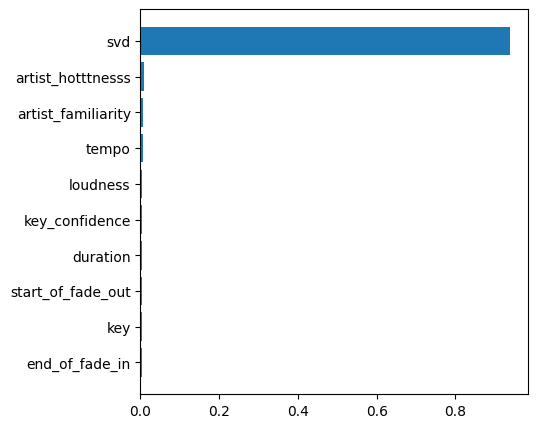

In [13]:
show_importances(xgb_models, features_1)

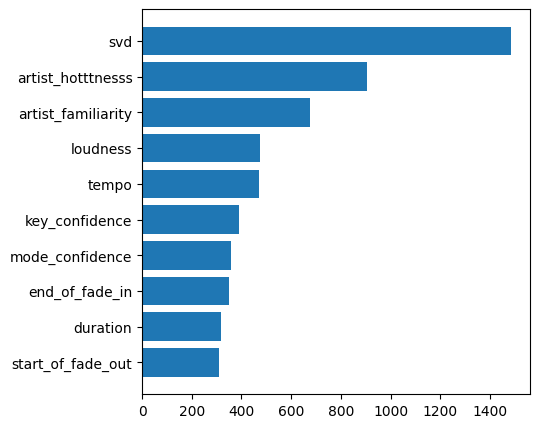

In [14]:
show_importances(lgb_models, features_1)

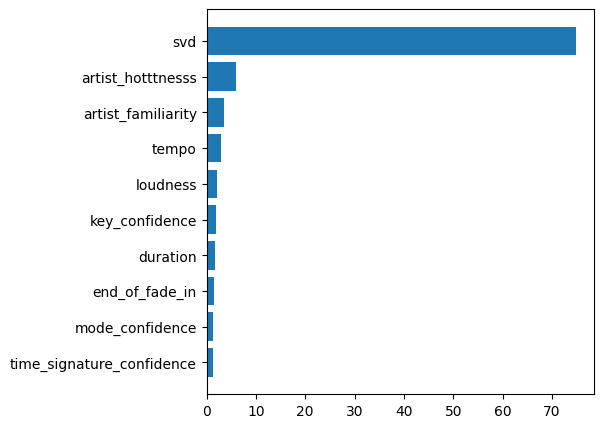

In [15]:
show_importances(ctb_models, features_1)

# Second Level Stacking - Ridge Regression


In [16]:
features_2 = ["xgb", "lgb", "ctb"]

In [17]:
ridge_models = []
ridge_scores = []

for fold in range(N_FOLDS):
    print(f"========== FOLD {fold} ==========")

    train = df_svd_valid[df_svd_valid.fold != fold]
    valid = df_svd_valid[df_svd_valid.fold == fold]

    X_train = train.loc[:, features_2]
    y_train = train.rating

    X_valid = valid.loc[:, features_2]
    y_valid = valid.rating

    # Train
    ridge_model = Ridge(alpha=1.0, random_state=SEED)
    ridge_model.fit(X_train, y_train)
    ridge_models.append(ridge_model)

    # Evaluate
    ridge_preds = ridge_model.predict(X_valid)
    ridge_score = rmse(y_valid, ridge_preds)
    ridge_scores.append(ridge_score)

    print(f"Valid Ridge: {ridge_score}")

print("============================")
print(f"Mean Valid RMSE: {sum(ridge_scores) / N_FOLDS}")

========== FOLD 0 ==========
Valid Ridge: 1.155482952429553
========== FOLD 1 ==========
Valid Ridge: 1.1553657291181822
========== FOLD 2 ==========
Valid Ridge: 1.1549150490702307
========== FOLD 3 ==========
Valid Ridge: 1.1572250254542282
========== FOLD 4 ==========
Valid Ridge: 1.1560691152539737
Mean Valid RMSE: 1.1558115742652337


# Final Results


In [18]:
test_preds = []

X_test_1 = df_svd_test.loc[:, features_1]

for fold in range(N_FOLDS):
    X_test_2 = pd.DataFrame()

    # First level stacking
    X_test_2["xgb"] = xgb_models[fold].predict(X_test_1)
    X_test_2["lgb"] = lgb_models[fold].predict(X_test_1)
    X_test_2["ctb"] = ctb_models[fold].predict(X_test_1)

    # Second level stacking
    test_pred = ridge_models[fold].predict(X_test_2)
    test_preds.append(test_pred)

# Final prediction is the mean of all folds
final_preds = np.mean(test_preds, axis=0)
df_svd_test["final_preds"] = final_preds
display(df_svd_test)

# Final Test RMSE
test_rmse = rmse(df_svd_test.rating, final_preds)
print(f"Final Test RMSE: {test_rmse}")

,user_id,song_id,rating,svd,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,...,song_hotttnesss,song_title,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id,final_preds
0,e4dea4adcf6ddb7799bbd4c39de312401ca903f6,SOUSOOB12A8C13371F,1,1.750224,304,0.899935,0.683658,ARH6W4X1187B99274F,NaN,"Oxford, UK",...,0.787082,House Of Cards,317.179,223.354,3,0.553,House Of Cards,2052656,TRLAUAI128F423DBC8,1.841482
1,d20772a4da25f18e07f699d9caad97d6ce29c087,SOMAKIT12A58A7E292,1,3.094228,37409,0.791022,0.620009,ARVSQHB1187B992FF0,NaN,NaN,...,0.301682,Bodies,197.428,130.868,4,0.278,Bodies,6522377,TRILVCI12903CCC9D7,3.076518
2,14f5804fda727f975f2db17d9fe982173cf5be6a,SOAXGDH12A8C13F8A1,5,3.241822,314523,0.818804,0.759102,ARNCHOP121318C56B8,NaN,NaN,...,1.000000,Dog Days Are Over (Radio Edit),212.010,149.979,4,0.953,Dog Days Are Over (Radio Edit),8616822,TRHKJNX12903CEFCDF,3.606148
3,bdd7e12da4453b3194bf4821483113d0e9f18679,SOTKYBW12A8C13C3EA,5,3.442455,153894,0.747955,0.532864,ARKDTAM1187FB54026,NaN,NaN,...,1.000000,Skinny Love,222.807,76.532,4,0.422,Skinny Love,2267104,TRXUWEC128F426BE3F,3.517514
4,a33a4287b68da98239be727bc4ad8c75f8e8d457,SORFXJO12A6D4FB614,1,2.565279,76154,0.599876,0.414517,ARHUU5P1187B98AFC3,NaN,NaN,...,0.604501,The Name Of This Thing Is Not Love,157.141,221.996,3,0.904,The Name Of This Thing Is Not Love,2235386,TRDOBCR128F4264561,2.603897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354614,6ecf0e508a0ac41184c59d7268550feb1ebc13c6,SOYAIPB12A8C143D84,3,3.761099,3501,0.842636,0.583531,ARWK5QH1187B9A9B7F,NaN,NaN,...,NaN,Cry Me A River,279.864,147.742,4,1.000,Cry Me A River,8201771,TRWDPTD12903D018B5,3.816160
354615,f2449d4b7e58856b38ff0f5384176abd1a61bb5f,SOLVRLL12A67020D7F,4,3.285627,75,0.836039,0.587040,ARWX5TK1187FB4CDBE,52.88356,Angleterre,...,NaN,Eminence Front,335.685,195.796,4,0.281,Eminence Front,147302,TRSAENQ128E078E9A9,3.321578
354616,dc61155e20289dcd089ac40181cb88f042404602,SOKUAEP12A8C13BE19,4,2.715512,17830,0.515278,0.373186,ARLLWJQ1187B9B06A7,NaN,Puerto Rico US,...,NaN,Estoy Enamorado De Ella (Salsa),202.919,182.972,4,0.000,Estoy Enamorado De Ella (Salsa),1665959,TRAFSCA128F4275C23,2.820687
354617,6531ff6155ae897a0cab6318df972ed814384554,SOKCORQ12A58A7C74D,5,3.611746,163273,0.874254,0.559480,ARW5QWS1187FB57C1B,NaN,"Dallas, TX",...,0.885178,Hey Brittany,169.488,120.139,3,0.960,Hey Brittany,3505062,TRDWPGB128F42B63B2,3.639108


Final Test RMSE: 1.1428563978090172


In [19]:
mean_rmse = mean_squared_error(
    df_svd_test.rating, [df_svd_test.rating.mean()] * len(df_svd_test), squared=False
)
percent_improvement = round((1 - (test_rmse / mean_rmse)) * 100, 1)
print(f"Improvement Over Mean Baseline: {percent_improvement}%")

Improvement Over Mean Baseline: 19.0%
